In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Load DataSet

In [2]:
# get titanic & test csv files as a DataFrame
train = pd.read_csv("train.csv", index_col='PassengerId')
test    = pd.read_csv("test.csv", index_col='PassengerId')

# preview the data

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing
* 데이터 편집을 쉽게 하기 위해 train과 test 두 table을 합쳐줘서 분석을 진행한다.

In [3]:
combi = pd.concat([train, test])
print(combi.shape)
combi.head()

(1309, 11)


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
combi = combi.drop(['Name','Ticket'], axis=1)
print(combi.shape)
combi.head()

(1309, 9)


,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
PassengerId,,,,,,,,,
1,22.0,NaN,S,7.2500,0,3,male,1,0.0
2,38.0,C85,C,71.2833,0,1,female,1,1.0
3,26.0,NaN,S,7.9250,0,3,female,0,1.0
4,35.0,C123,S,53.1000,0,1,female,1,1.0
5,35.0,NaN,S,8.0500,0,3,male,0,0.0


In [5]:
combi.info()

# info() 를 각 column의 데이터 타입과 NaN 포함 여부를 확인.
# Embarked column은 1309- 1307 = 2개의 NaN value를 포함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


## Encoding

### Embarked

In [6]:
combi[pd.isnull(combi['Embarked'])]

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
PassengerId,,,,,,,,,
62,38.0,B28,NaN,80.0,0,1,female,0,1.0
830,62.0,B28,NaN,80.0,0,1,female,0,1.0


In [7]:
 # confirmation top freqeunce value
combi['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [8]:
 # fill the 'NaN' value of 'Embarked' column
combi['Embarked'] = combi['Embarked'].fillna('S')
combi[pd.isnull(combi['Embarked'])]

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
PassengerId,,,,,,,,,


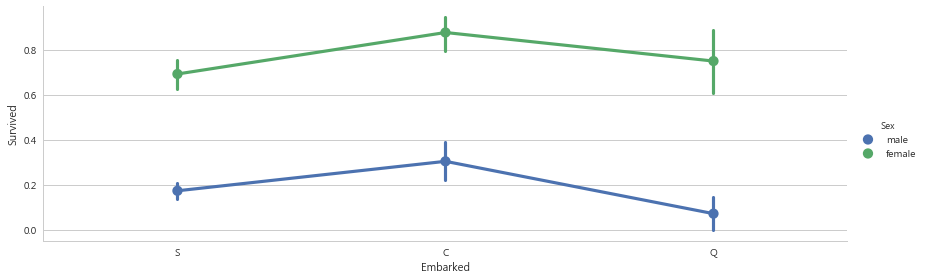

In [9]:
sns.factorplot('Embarked','Survived', hue="Sex", data=combi, size=4, aspect=3)

 # (x data, y data, total dataframe, 크기, 크기)
# barplot이나 scatter 과 다르게 "비교"를 위해 만들어진 plot이다. 
# kind 인자를 통해 plot 모양의 선택이 가능하다.
# factorplot의 가장 큰 장점은 'categorical' data를 손쉽게 비교하고 분석 할 수 있다는 것이다.
# 그리고 FacetGrid가 매우 간편한데. col argument에 'Day'를 입력했다하면 날짜별 plot을 나눠 볼 수 있다.

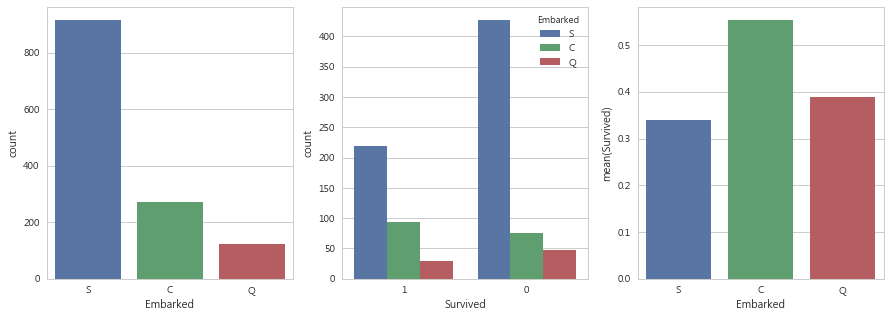

In [10]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(15,5))
# plt.subplots는 다중 그래프를 시각화 할때 사용
# fig는 약속이며, 그 뒤에 (axis1 ~ axis3) 은 각 subplot의 해당 번호이다.

sns.countplot(x='Embarked', data=combi, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=combi, order=[1,0], ax=axis2)
# countplot은 data의 개수를 counting한다.

embark_perc = combi[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()
#  Embarked column을 기준으로 group을 묶는다. 
#  Why? combi['Survived'].groupby(combi['Embarked']).mean() 을 사용하지 않았니?? 
# 1. plot에 나타낼때 x축, y축의 기준이 필요하기 때문에
# 2. grouby(combi['Embarked']) 와 combi[['Embarked','Survived']].grouby(['Embarked']) 의 차이점
# : 전자는 이미 key를 지정할때 combi['Embarked']를 해서 이 column을 groupby한 변수의 column으로 사용 할 수 없다. 하지만 후자는 앞에서 선언한 dataframe내에서 groupby를 한다. 따라서 index의 축약이 없다??..

sns.barplot(x='Embarked',y='Survived', data=embark_perc, order=['S','C','Q'], ax= axis3)

#### 분석결과
* Embarked column의 3가지 요소 S, C, Q 중 S는 보유한 count에 비해 적은 생존률을 보여주므로 분석의 효용이 떨어지는 data일 것이다. 이와 반대로 C, Q 요소는 count에 비해 높은 생존률을 보여준다.
* 따라서 S 요소를 지우고 C & Q 의 요소를 pd.get_dummies() 를 사용하여 살리겠다.

In [11]:
embarked_dummies = pd.get_dummies(combi['Embarked'], prefix='Embarked')
embarked_dummies.drop(['Embarked_S'], axis=1, inplace=True)

In [12]:
combi = pd.concat([combi, embarked_dummies], axis=1)

In [13]:
combi.drop('Embarked',axis=1,inplace=True)

In [14]:
print(combi.shape)
combi.head()

(1309, 10)


,Age,Cabin,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,
1,22.0,NaN,7.2500,0,3,male,1,0.0,0,0
2,38.0,C85,71.2833,0,1,female,1,1.0,1,0
3,26.0,NaN,7.9250,0,3,female,0,1.0,0,0
4,35.0,C123,53.1000,0,1,female,1,1.0,0,0
5,35.0,NaN,8.0500,0,3,male,0,0.0,0,0


### Fare

In [15]:
np.dtype(combi['Fare'])

dtype('float64')

In [16]:
combi[pd.isnull(combi['Fare'])]

,Age,Cabin,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,
1044,60.5,NaN,NaN,0,3,male,0,NaN,0,0


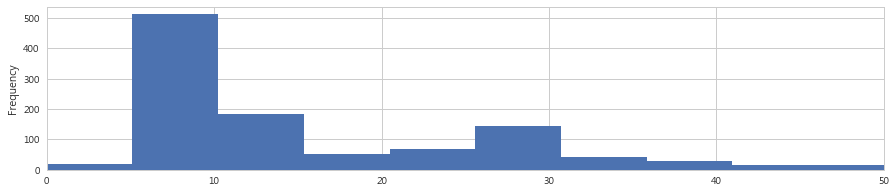

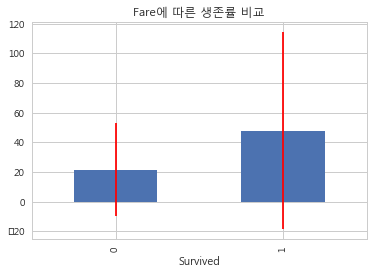

In [17]:
combi['Fare'].fillna(combi['Fare'].median(), inplace=True)
# NaN 값처리

combi['Fare']=combi['Fare'].astype(np.int)
# float 자료형을 int로 변경

fare_not_survived = combi['Fare'][combi['Survived']==0]
fare_survived = combi['Fare'][combi['Survived']==1]
# 'Fare' 별 생존자 수 비교

average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = DataFrame([fare_not_survived.std(), fare_survived.std()])
# DataFrame을 사용하여 list타입을 변경해 주었다. ( visualization을 위해 )

combi['Fare'].plot(kind='hist',  bins=100, xlim=(0,50), figsize=(15,3))
# 시각화
#!! histogram ( x축의 범위가 넓다 )을 그릴때는 sns 가 아닌 plot kind='hist' 가 좋다. or data.hist()

average_fare.index.names = std_fare.index.names = ['Survived']
average_fare.plot(yerr=std_fare, kind='bar', legend=False, title='Fare에 따른 생존률 비교', ecolor='red')
# plot 함수의 사용     <->  plt.bar 의 사용
# yerr 는 해당 plot 마다 'y축'으로 선언해준 값만큼 선을 그려준다 => 평균과 분산을 볼때 자주 사용된다.

### Age

C:\Users\Moon\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


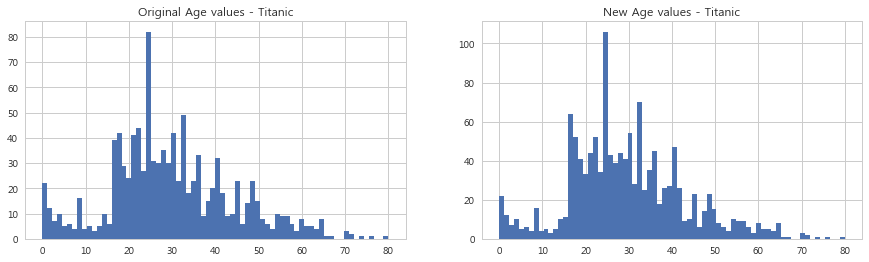

In [18]:
fig , (axis1, axis2) = plt.subplots(1,2, figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

average_age = combi['Age'].mean()
std_age = combi['Age'].std()
count_nan_age = combi['Age'].isnull().sum()
# null값의 개수를 counting 하는 skill

rand_1 = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)
# random 변수 생성
# x 부터 y-1 까지 포함 size는 개수


combi['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# NaN 값들을 drop시키고 남은 값들을 int시킨다

combi['Age'][pd.isnull(combi['Age'])] = rand_1
# NaN 값들의 빈값을 평균과 분산을 통해 처리하였다.

combi['Age'] = combi['Age'].astype(int)

combi['Age'].hist(bins=70, ax=axis2)

C:\Users\Moon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


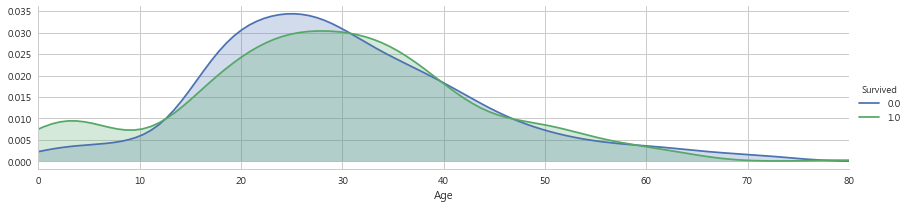

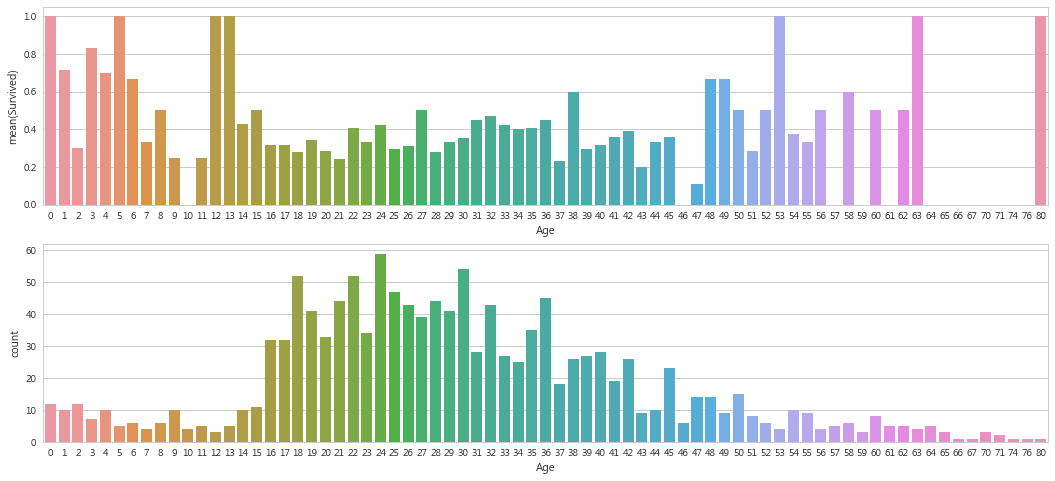

In [19]:
facet = sns.FacetGrid(combi, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, combi['Age'].max()))
facet.add_legend()
facet.set_titles('Line about surviving by their age')

fig, (axis1,axis2) = plt.subplots(2,1, figsize=(18,8))
average_age = combi[['Age','Survived']].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age, ax=axis1)
# average_age 변수에 2개의 column( age, survived ) 가 있다.

sns.countplot(x='Age', data=combi, ax=axis2)

### 분석결과
* 13세 이하의 아이들의 생존확률이 매우 높다는 것을 확인하였다.
* 63세 의 생존확률도 높지만 counting 수가 너무 부족하다.

### Sex
* we think passenger`s as child(age <16), female, male

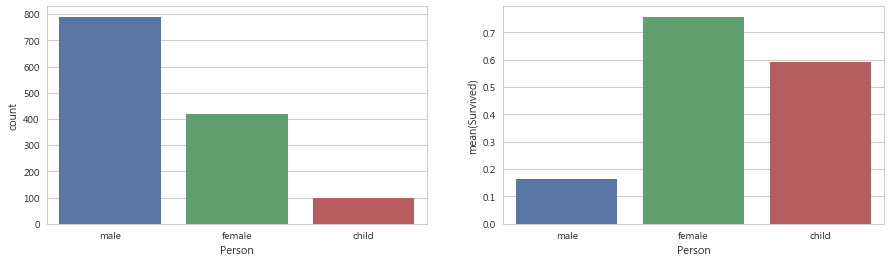

In [20]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age<=13 else sex

combi['Person'] = combi[['Age', 'Sex']].apply(get_person, axis=1)

combi.drop(['Sex'], axis=1).shape
#drop already existing column

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(15,4))

sns.countplot(x='Person', data=combi, ax=axis1)
# count visual

person_prec = combi[['Person','Survived']].groupby(['Person'], as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_prec, ax=axis2, order=['male','female','child'])
# percentage visual


### 분석결과
* male의 생존률이 매우 낮다... 따라서 male 변수를 지우자.

In [21]:
person_dummies = pd.get_dummies(combi['Person'])
person_dummies.columns = ['Child','Female','Male']
person_dummies.drop(['Male'], axis=1, inplace=True)
# Male 변수를 Family에서 제거

In [22]:
combi = pd.concat([combi, person_dummies], axis=1)
print(combi.shape)
combi.head()

(1309, 13)


,Age,Cabin,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Person,Child,Female
PassengerId,,,,,,,,,,,,,
1,22,NaN,7,0,3,male,1,0.0,0,0,male,0,0
2,38,C85,71,0,1,female,1,1.0,1,0,female,0,1
3,26,NaN,7,0,3,female,0,1.0,0,0,female,0,1
4,35,C123,53,0,1,female,1,1.0,0,0,female,0,1
5,35,NaN,8,0,3,male,0,0.0,0,0,male,0,0


In [23]:
combi.drop(['Sex','Person'], axis=1, inplace=True)

In [24]:
print(combi.shape)
combi.head()

(1309, 11)


,Age,Cabin,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Child,Female
PassengerId,,,,,,,,,,,
1,22,NaN,7,0,3,1,0.0,0,0,0,0
2,38,C85,71,0,1,1,1.0,1,0,0,1
3,26,NaN,7,0,3,0,1.0,0,0,0,1
4,35,C123,53,0,1,1,1.0,0,0,0,1
5,35,NaN,8,0,3,0,0.0,0,0,0,0


### cabin

In [25]:
combi[pd.isnull(combi['Cabin'])].shape

(1014, 11)

In [26]:
combi.drop('Cabin',axis=1,inplace=True)

### Family
* we have two columns related to familly that are Parch & SibSp
* So, we can have only one column by combinate tow column
* it is mean that, if having any family member(wheter parent, brotehr, ...etc) will increase chances of Survival or not

In [27]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
Age           1309 non-null int32
Fare          1309 non-null int32
Parch         1309 non-null int64
Pclass        1309 non-null int64
SibSp         1309 non-null int64
Survived      891 non-null float64
Embarked_C    1309 non-null uint8
Embarked_Q    1309 non-null uint8
Child         1309 non-null uint8
Female        1309 non-null uint8
dtypes: float64(1), int32(2), int64(3), uint8(4)
memory usage: 66.5 KB


In [28]:
combi['Family'] = combi['Parch'] + combi['SibSp']
# combinate two columns

In [29]:
combi['Family'].loc[combi['Family'] > 0] = 1
combi['Family'].loc[combi['Family'] == 0] = 0
# loc를 사용해야지만 column내의 값을 넣을 수 있다.
# value를 넣지 않고 그냥 view만 하고 싶으면
# combi[combi['Family'] > 0]['Family'] 로 볼 수 있다.

C:\Users\Moon\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[<matplotlib.text.Text at 0xcecb400>, <matplotlib.text.Text at 0xcebb5c0>]

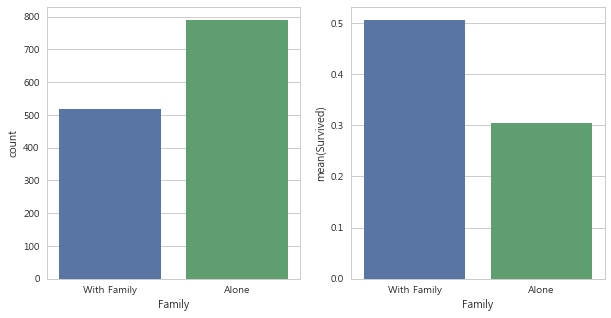

In [33]:
combi.drop(['Parch','SibSp'], axis=1, inplace=True)

fig, (axis1,axis2) = plt.subplots(1,2, sharex=True, figsize=(10,5) )

sns.countplot(x='Family', data=combi, order=[1,0], ax=axis1)

family_perc = combi[['Family','Survived']].groupby(['Family'], as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)
#시각화

axis1.set_xticklabels(['With Family','Alone'], rotation=0)
# axis1, axis2 같이 subplots 로 변수로 이 plt 를 선언해 주었기 때문에 이 변수에 여러 시각화 옵션들을 적용할 수 있다.
# xtick은 x범례를 의미
# rotation 을 통해 글자의 방향을 지정해준다.

#### 분석결과
* Family가 존재할때 생존률이 높다.

### Pclass

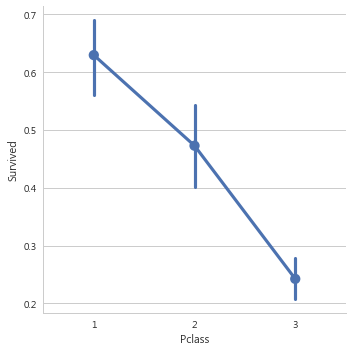

In [31]:
sns.factorplot('Pclass','Survived',order=[1,2,3], data=combi, size=5)
# 3의 생존률이 매우 떨어진다.

pclass_dummies = pd.get_dummies(combi['Pclass'], prefix='Class')
pclass_dummies.drop('Class_3', axis=1, inplace=True)

combi.drop(['Pclass'], axis=1, inplace=True)

In [32]:
combi = pd.concat([combi, pclass_dummies], axis=1)
print(combi.shape)
combi.head()

(1309, 12)


,Age,Fare,Parch,SibSp,Survived,Embarked_C,Embarked_Q,Child,Female,Family,Class_1,Class_2
PassengerId,,,,,,,,,,,,
1,22,7,0,1,0.0,0,0,0,0,1,0,0
2,38,71,0,1,1.0,1,0,0,1,1,1,0
3,26,7,0,0,1.0,0,0,0,1,0,0,0
4,35,53,0,1,1.0,0,0,0,1,1,1,0
5,35,8,0,0,0.0,0,0,0,0,0,0,0


## Score
* cross-validation 을 사용하여 training data를 분리하여 구축한 model의 예측률을 점수 매긴다.

In [39]:
train = combi[pd.notnull(combi['Survived'])]
print(train.shape)

test = combi[pd.isnull(combi['Survived'])]
print(test.shape)

(891, 10)
(418, 10)


In [102]:
# train data(column) 선택

feature_names = ['Embarked_C' ,'Embarked_Q', 'Child' ,'Female' ,'Family', 'Class_1' ,'Class_2']

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 7)


,Embarked_C,Embarked_Q,Child,Female,Family,Class_1,Class_2
PassengerId,,,,,,,
1,0,0,0,0,1,0,0
2,1,0,0,1,1,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,1,1,0
5,0,0,0,0,0,0,0


In [103]:
label_name = 'Survived'
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: Survived, dtype: float64

In [104]:
from sklearn.cross_validation import cross_val_score

model = RandomForestClassifier(n_estimators=100)
score = cross_val_score(model, X_train, y_train, cv=100).mean()

print('Score = {score: .5f}' .format(score=score))

Score =  0.81411


### Prediction

In [94]:
X_test = test[feature_names]
X_test.drop(['Survived'],axis=1,inplace=True)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
prediction[:15]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.])

### Submission

In [88]:
submission = pd.read_csv('gender_submission.csv', index_col='PassengerId')

submission['Survived'] = prediction.astype(np.int)

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [95]:
submission.to_csv('test2.csv')